<a href="https://colab.research.google.com/github/kalebihsdecarvalho/Celeritas-Segunda_Fase/blob/main/Celeritas_Arquivo_Prova_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns

In [ ]:
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dados de Treinamento para o modelo

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/treino.csv', sep=',')
display(base)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,target
0,1035,2.440291,18.803669,58.516966,9.036167,50.743645,2.616749,10.795447,7.660446,4.668714,...,4.902706,32.456142,7.968399,3.091370,7.347987,6.059947,1.127013,42.602430,14.998465,0
1,4114,2.169448,24.294184,67.503844,11.834599,45.908778,2.011304,26.907888,6.340541,3.395222,...,4.696788,54.560997,7.041915,2.994271,6.647018,5.601878,1.147552,41.864156,19.513713,0
2,929,3.023596,10.293279,65.193868,9.252690,32.051982,2.968073,15.973128,3.868862,5.101278,...,3.778641,38.996286,4.508824,2.826542,4.504206,7.569435,0.669029,59.064639,14.957184,0
3,2642,2.767535,18.945972,65.554293,11.736898,48.732568,3.378123,15.704830,5.978061,3.454681,...,4.933742,63.196446,5.938648,2.878741,8.451534,5.495360,1.107726,43.295682,18.738351,0
4,7206,3.101379,13.828258,84.972532,11.598183,48.987365,3.345562,18.102956,4.185259,3.708816,...,3.388722,61.371441,6.734750,2.242443,6.921818,7.739376,1.126734,42.612441,17.255943,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,667,2.671756,15.420767,46.566166,10.241081,51.335188,4.025834,14.369937,4.055882,6.140577,...,4.119027,70.506978,7.192803,2.569739,6.074205,5.876265,1.202896,39.874817,29.664263,0
5596,946,3.843308,13.961263,82.906401,13.051540,27.796276,3.006076,21.921841,6.990348,3.590738,...,4.479089,45.034676,3.532109,2.362272,4.869530,6.732344,0.868494,51.894859,5.385252,0
5597,7884,2.494120,18.897177,62.079778,12.147123,44.424104,3.701995,16.463829,6.217071,5.078469,...,4.424852,50.869287,7.009430,2.926216,6.803613,6.422749,1.085042,44.111082,15.088267,0
5598,7526,3.313104,13.865495,82.456805,9.416999,34.334645,3.414583,16.764484,5.009986,2.452257,...,3.917487,56.293930,4.568372,4.077894,7.050578,6.934904,1.258511,37.875748,23.141643,1


In [ ]:
base = base.drop('id', axis = 1)

# Quantidade de valores únicos


In [ ]:
base.ndim

2

In [ ]:
base.nunique()

col_0     5600
col_1     5600
col_2     5600
col_3     5600
col_4     5600
col_5     5600
col_6     5600
col_7     5600
col_8     5600
col_9     5600
col_10    5600
col_11    5600
col_12    5600
col_13    5600
col_14    5600
col_15    5600
col_16    5600
col_17    5600
col_18    5600
col_19    5600
target       2
dtype: int64

# Criando Matriz de correlação entre as variáveis

In [ ]:
base.corr()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,target
col_0,1.000000,-0.263343,0.220018,-0.166528,-0.173504,0.104887,0.002233,0.199309,-0.026197,-0.217856,...,0.048844,0.299366,-0.059644,-0.034162,0.032572,0.012823,0.021311,-0.021311,0.102342,-0.031945
col_1,-0.263343,1.000000,-0.318633,0.310148,0.207409,-0.349739,0.440726,0.680584,0.272012,-0.170147,...,0.403754,-0.060949,0.470519,0.458083,0.315756,-0.534819,0.150506,-0.150506,-0.078476,-0.063731
col_2,0.220018,-0.318633,1.000000,-0.466916,-0.198521,0.167255,0.207902,-0.221160,-0.402197,0.050300,...,-0.392567,0.234399,-0.229044,-0.033453,0.096050,0.251333,0.492333,-0.492333,-0.409794,-0.014615
col_3,-0.166528,0.310148,-0.466916,1.000000,0.216042,0.026354,0.150559,0.115616,0.077269,0.202727,...,-0.076405,-0.057855,0.067355,0.014934,-0.007658,0.039276,-0.242652,0.242652,0.047972,-0.069251
col_4,-0.173504,0.207409,-0.198521,0.216042,1.000000,-0.442220,-0.307781,0.097588,0.271554,0.217875,...,-0.402248,-0.093743,0.338918,-0.283514,0.418425,-0.225779,0.090252,-0.090252,0.248101,0.114226
col_5,0.104887,-0.349739,0.167255,0.026354,-0.442220,1.000000,0.076478,-0.282190,-0.163431,-0.019597,...,-0.140873,0.476953,-0.231253,-0.097999,-0.025987,0.106538,-0.099652,0.099652,-0.030591,0.015696
col_6,0.002233,0.440726,0.207902,0.150559,-0.307781,0.076478,1.000000,0.034298,-0.085883,-0.184402,...,0.125979,0.372180,-0.060060,0.023194,0.162632,-0.079461,-0.026696,0.026696,-0.125487,-0.109665
col_7,0.199309,0.680584,-0.221160,0.115616,0.097588,-0.282190,0.034298,1.000000,0.230480,-0.538316,...,0.485781,-0.250245,0.461610,0.386572,0.090128,-0.494884,0.352635,-0.352635,-0.245034,-0.044613
col_8,-0.026197,0.272012,-0.402197,0.077269,0.271554,-0.163431,-0.085883,0.230480,1.000000,-0.028282,...,0.050920,-0.295421,0.091813,-0.003926,0.052814,-0.097186,0.026450,-0.026450,-0.042591,-0.044936
col_9,-0.217856,-0.170147,0.050300,0.202727,0.217875,-0.019597,-0.184402,-0.538316,-0.028282,1.000000,...,-0.201616,0.325518,-0.081896,-0.163557,-0.070954,0.061551,-0.106651,0.106651,0.139680,-0.006424


<Axes: >

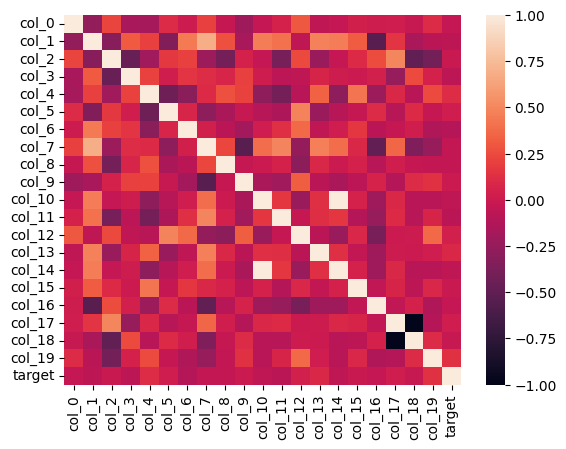

In [ ]:
sns.heatmap(base.corr())

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5600 non-null   float64
 1   col_1   5600 non-null   float64
 2   col_2   5600 non-null   float64
 3   col_3   5600 non-null   float64
 4   col_4   5600 non-null   float64
 5   col_5   5600 non-null   float64
 6   col_6   5600 non-null   float64
 7   col_7   5600 non-null   float64
 8   col_8   5600 non-null   float64
 9   col_9   5600 non-null   float64
 10  col_10  5600 non-null   float64
 11  col_11  5600 non-null   float64
 12  col_12  5600 non-null   float64
 13  col_13  5600 non-null   float64
 14  col_14  5600 non-null   float64
 15  col_15  5600 non-null   float64
 16  col_16  5600 non-null   float64
 17  col_17  5600 non-null   float64
 18  col_18  5600 non-null   float64
 19  col_19  5600 non-null   float64
 20  target  5600 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

# Variáveis para treino

In [ ]:
x = base.drop('target', axis=1)
display(x)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,2.440291,18.803669,58.516966,9.036167,50.743645,2.616749,10.795447,7.660446,4.668714,26.952929,2.952721,4.902706,32.456142,7.968399,3.091370,7.347987,6.059947,1.127013,42.602430,14.998465
1,2.169448,24.294184,67.503844,11.834599,45.908778,2.011304,26.907888,6.340541,3.395222,28.756877,2.859976,4.696788,54.560997,7.041915,2.994271,6.647018,5.601878,1.147552,41.864156,19.513713
2,3.023596,10.293279,65.193868,9.252690,32.051982,2.968073,15.973128,3.868862,5.101278,31.376333,2.699770,3.778641,38.996286,4.508824,2.826542,4.504206,7.569435,0.669029,59.064639,14.957184
3,2.767535,18.945972,65.554293,11.736898,48.732568,3.378123,15.704830,5.978061,3.454681,41.086669,2.749628,4.933742,63.196446,5.938648,2.878741,8.451534,5.495360,1.107726,43.295682,18.738351
4,3.101379,13.828258,84.972532,11.598183,48.987365,3.345562,18.102956,4.185259,3.708816,42.120013,2.141868,3.388722,61.371441,6.734750,2.242443,6.921818,7.739376,1.126734,42.612441,17.255943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,2.671756,15.420767,46.566166,10.241081,51.335188,4.025834,14.369937,4.055882,6.140577,38.611271,2.454485,4.119027,70.506978,7.192803,2.569739,6.074205,5.876265,1.202896,39.874817,29.664263
5596,3.843308,13.961263,82.906401,13.051540,27.796276,3.006076,21.921841,6.990348,3.590738,28.692519,2.256323,4.479089,45.034676,3.532109,2.362272,4.869530,6.732344,0.868494,51.894859,5.385252
5597,2.494120,18.897177,62.079778,12.147123,44.424104,3.701995,16.463829,6.217071,5.078469,36.357614,2.794973,4.424852,50.869287,7.009430,2.926216,6.803613,6.422749,1.085042,44.111082,15.088267
5598,3.313104,13.865495,82.456805,9.416999,34.334645,3.414583,16.764484,5.009986,2.452257,27.336522,3.894999,3.917487,56.293930,4.568372,4.077894,7.050578,6.934904,1.258511,37.875748,23.141643


In [ ]:
y = base.target
display(y)

0       0
1       0
2       0
3       0
4       0
       ..
5595    0
5596    0
5597    0
5598    1
5599    0
Name: target, Length: 5600, dtype: int64

# Modelos de Classificação

K.Vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Classificador

In [ ]:
vizinho = KNeighborsClassifier(3)
vizinho.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
valores = vizinho.predict(x)

In [ ]:
vizinho.score(x, y)

0.9228571428571428

In [ ]:
pd.DataFrame(valores, columns=['Previsões']).to_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test.csv', index=False)
previsoes_vizinhos = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test.csv', sep=',')
display(previsoes_vizinhos)

,Previsões
0,0
1,0
2,0
3,0
4,0
...,...
5595,0
5596,0
5597,0
5598,0


# Árvore de Decisão


In [ ]:
from sklearn import tree

In [ ]:
arvore = tree.DecisionTreeClassifier(random_state=0)
arvore.fit(x, y)

DecisionTreeClassifier(random_state=0)

In [ ]:
valores_arvore = arvore.predict(x)

In [ ]:
pd.DataFrame(valores_arvore, columns=['Previsões']).to_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test-arvore.csv', index=False)
previsoes_arvore = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test-arvore.csv', sep=',')
display(previsoes_arvore)

,Previsões
0,0
1,0
2,0
3,0
4,0
...,...
5595,0
5596,0
5597,0
5598,1


In [ ]:
arvore.score(x, y)

1.0

# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=0,max_iter=1000)
logistica.fit(x, y)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
valores_logistica = logistica.predict(x)

In [ ]:
pd.DataFrame(valores_logistica, columns=['Previsões']).to_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test-regressao.csv', index=False)
previsoes_logistica = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição-test-regressao.csv', sep=',')
display(previsoes_logistica)

,Previsões
0,0
1,0
2,0
3,0
4,0
...,...
5595,0
5596,0
5597,0
5598,0


In [ ]:
logistica.score(x, y)

0.8866071428571428

# Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, previsoes_vizinhos)

array([[4906,   44],
       [ 388,  262]])

In [ ]:
confusion_matrix(y, previsoes_arvore)

array([[4950,    0],
       [   0,  650]])

In [ ]:
confusion_matrix(y, previsoes_logistica)

array([[4944,    6],
       [ 629,   21]])

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, previsoes_vizinhos)

0.9228571428571428

In [ ]:
accuracy_score(y, previsoes_arvore)

1.0

In [ ]:
accuracy_score(y, previsoes_logistica)

0.8866071428571428

Precisão


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y, previsoes_vizinhos)

0.8562091503267973

In [ ]:
precision_score(y, previsoes_arvore)

1.0

In [ ]:
precision_score(y, previsoes_logistica)

0.7777777777777778

Recall - Relação

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y, previsoes_vizinhos)

0.40307692307692305

In [ ]:
recall_score(y, previsoes_arvore)

1.0

In [ ]:
recall_score(y, previsoes_logistica)

0.03230769230769231

# Dados de Teste

In [ ]:
base_teste = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/teste.csv', sep=',')
display(base_teste)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,2935,3.794996,17.619636,88.032837,7.635636,44.432242,2.214725,15.713429,9.240879,4.421333,...,3.080660,4.314130,42.545982,6.072102,3.225317,5.789060,4.449545,1.495420,29.360051,11.991906
1,3298,3.334634,11.004504,75.904020,10.714140,33.870530,2.571405,14.977010,4.981398,3.953721,...,2.529587,4.560897,44.401007,3.747090,2.648367,4.633839,7.383860,1.076733,44.409749,14.350560
2,6683,2.556022,24.318075,72.921526,12.807290,53.985423,2.035971,14.082178,9.281626,1.820876,...,4.119782,4.352199,42.203536,10.801200,4.313232,6.251253,5.468431,1.445550,31.152613,17.719692
3,5441,3.297353,24.022598,82.204430,8.931847,42.225646,4.700986,17.620649,9.706089,4.781520,...,4.267029,4.236558,59.082560,6.472898,4.467393,9.898321,3.688022,1.498425,29.252043,13.994709
4,3945,2.162462,21.429583,51.599856,10.305356,62.375489,2.579771,12.703993,7.572968,5.176573,...,2.704049,4.362269,44.757656,6.555755,2.831021,8.242778,3.936831,1.151187,41.733475,17.996966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,5852,4.009216,13.457122,131.814291,9.326082,45.971774,2.411287,23.582814,4.799468,1.370848,...,3.278644,2.132644,64.223280,5.006286,3.432598,7.478930,7.895832,1.744570,20.404371,19.100281
2396,4553,3.307813,17.290765,59.512192,13.575789,37.041380,5.417592,18.432972,5.652665,6.496697,...,3.468309,2.939956,74.288519,6.156429,3.631169,5.187356,4.590176,0.906813,50.517487,17.428064
2397,5631,2.342880,27.664502,60.473193,11.265703,51.974336,2.851382,12.125027,10.600975,6.947247,...,3.341265,6.241231,48.297252,6.182346,3.498159,7.436710,2.626359,1.750502,20.191150,9.525166
2398,1803,2.504107,25.733284,59.145501,11.736005,41.153369,3.041474,17.800013,9.958658,5.727817,...,3.399153,5.574975,41.323148,7.668017,3.558766,6.086366,4.295810,1.336463,35.073749,9.853845


In [ ]:
id = base_teste.id
base_teste = base_teste.drop('id', axis=1)
display(id)
display(base_teste)

0       2935
1       3298
2       6683
3       5441
4       3945
        ... 
2395    5852
2396    4553
2397    5631
2398    1803
2399    3185
Name: id, Length: 2400, dtype: int64

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,3.794996,17.619636,88.032837,7.635636,44.432242,2.214725,15.713429,9.240879,4.421333,18.616835,3.080660,4.314130,42.545982,6.072102,3.225317,5.789060,4.449545,1.495420,29.360051,11.991906
1,3.334634,11.004504,75.904020,10.714140,33.870530,2.571405,14.977010,4.981398,3.953721,37.801224,2.529587,4.560897,44.401007,3.747090,2.648367,4.633839,7.383860,1.076733,44.409749,14.350560
2,2.556022,24.318075,72.921526,12.807290,53.985423,2.035971,14.082178,9.281626,1.820876,29.811452,4.119782,4.352199,42.203536,10.801200,4.313232,6.251253,5.468431,1.445550,31.152613,17.719692
3,3.297353,24.022598,82.204430,8.931847,42.225646,4.700986,17.620649,9.706089,4.781520,16.644502,4.267029,4.236558,59.082560,6.472898,4.467393,9.898321,3.688022,1.498425,29.252043,13.994709
4,2.162462,21.429583,51.599856,10.305356,62.375489,2.579771,12.703993,7.572968,5.176573,29.268707,2.704049,4.362269,44.757656,6.555755,2.831021,8.242778,3.936831,1.151187,41.733475,17.996966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,4.009216,13.457122,131.814291,9.326082,45.971774,2.411287,23.582814,4.799468,1.370848,30.521580,3.278644,2.132644,64.223280,5.006286,3.432598,7.478930,7.895832,1.744570,20.404371,19.100281
2396,3.307813,17.290765,59.512192,13.575789,37.041380,5.417592,18.432972,5.652665,6.496697,37.087057,3.468309,2.939956,74.288519,6.156429,3.631169,5.187356,4.590176,0.906813,50.517487,17.428064
2397,2.342880,27.664502,60.473193,11.265703,51.974336,2.851382,12.125027,10.600975,6.947247,41.472792,3.341265,6.241231,48.297252,6.182346,3.498159,7.436710,2.626359,1.750502,20.191150,9.525166
2398,2.504107,25.733284,59.145501,11.736005,41.153369,3.041474,17.800013,9.958658,5.727817,27.084992,3.399153,5.574975,41.323148,7.668017,3.558766,6.086366,4.295810,1.336463,35.073749,9.853845


In [ ]:
previsao_base = arvore.predict(base_teste)

In [ ]:
pd.DataFrame(id, columns=['id']).to_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição.csv', index=False)
previsao_total = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição.csv', sep=',')
display(previsao_total)

,id
0,2935
1,3298
2,6683
3,5441
4,3945
...,...
2395,5852
2396,4553
2397,5631
2398,1803


In [ ]:
previsao_total['Predição'] = previsao_base
display(previsao_total)

,id,Predição
0,2935,0
1,3298,0
2,6683,0
3,5441,0
4,3945,0
...,...,...
2395,5852,1
2396,4553,0
2397,5631,0
2398,1803,0


In [ ]:
pd.DataFrame(previsao_total, columns=['id','Predição']).to_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição.csv', index=False)
prev = pd.read_csv('/content/drive/MyDrive/Celeritas - Arquivo Prova 2023/predição.csv', sep=',')
display(prev)

,id,Predição
0,2935,0
1,3298,0
2,6683,0
3,5441,0
4,3945,0
...,...,...
2395,5852,1
2396,4553,0
2397,5631,0
2398,1803,0
